In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
from sklearn import svm, model_selection as ms, metrics

# Ex. 4

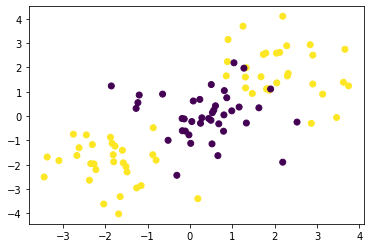

In [3]:
seed = 1
np.random.seed(seed)
X = np.random.normal(size=200).reshape(100, 2)
X[:30] = X[:30] + 2
X[30:60] = X[30:60] - 2
y = np.concatenate((np.ones(60), -np.ones(40)))
plt.scatter(X[:, 0], X[:, 1], c=y)

In [4]:
X_train, X_test, y_train, y_test = ms.train_test_split(X, y, test_size=.25, random_state=seed)

In [5]:
def plot_decision(model, X, y, pad=1.):

    h = .02  # step size in the mesh

    # create a mesh to plot in
    x_min, x_max = X[:, 0].min() - pad, X[:, 0].max() + pad
    y_min, y_max = X[:, 1].min() - pad, X[:, 1].max() + pad

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Pastel1, alpha=0.8)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(model.__repr__())


Test accuracy: 0.52


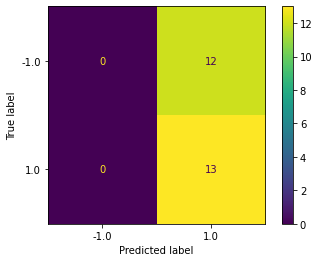

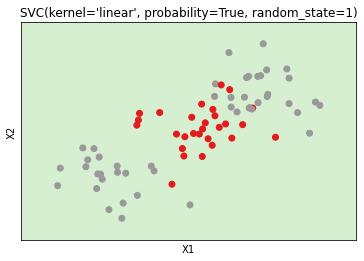

In [6]:
model = svm.SVC(kernel='linear', probability=True, random_state=seed)
model.fit(X_train, y_train)

metrics.plot_confusion_matrix(model, X_test, y_test)
plt.figure()
plot_decision(model, X_train, y_train)
print(f'Test accuracy: {metrics.accuracy_score(y_test, model.predict(X_test))}')

Test accuracy: 0.96


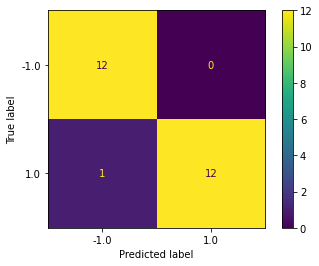

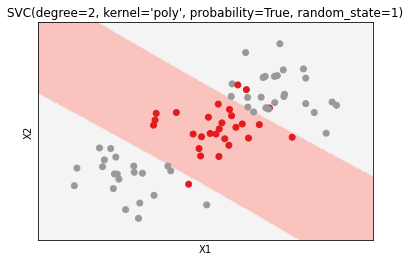

In [7]:
model = svm.SVC(kernel='poly', degree=2, probability=True, random_state=seed)
model.fit(X_train, y_train)

metrics.plot_confusion_matrix(model, X_test, y_test)
plt.figure()
plot_decision(model, X_train, y_train)
print(f'Test accuracy: {metrics.accuracy_score(y_test, model.predict(X_test))}')

Test accuracy: 0.84


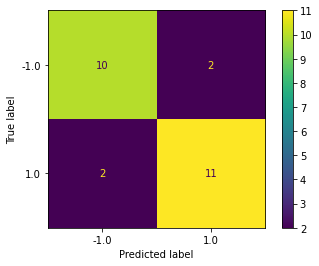

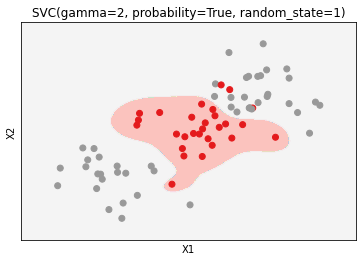

In [8]:
model = svm.SVC(kernel='rbf', gamma=2, probability=True, random_state=seed)
model.fit(X_train, y_train)

metrics.plot_confusion_matrix(model, X_test, y_test)
plt.figure()
plot_decision(model, X_train, y_train)
print(f'Test accuracy: {metrics.accuracy_score(y_test, model.predict(X_test))}')

Plots show that poly kernel with 2 degrees performs best on test data.

# Ex. 5

Text(0, 0.5, 'X2')

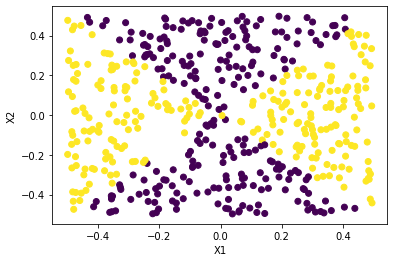

In [9]:
seed = 1
np.random.seed(seed)
X = np.random.uniform(low=-.5, high=.5, size=1000).reshape(500, 2)
y = (X[:, 0] ** 2 - X[:, 1] ** 2 > 0).astype(int)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel('X1')
plt.ylabel('X2')

In [10]:
def plot_results(model, X, y, x1_idx=0, x2_idx=1, pad=1.):

    x_min, x_max = X[:, x1_idx].min() - pad, X[:, x1_idx].max() + pad
    y_min, y_max = X[:, x2_idx].min() - pad, X[:, x2_idx].max() + pad

    preds = model.predict(X)

    plt.scatter(X[:, x1_idx], X[:, x2_idx], c=preds, cmap=plt.cm.Set1)
    plt.xlabel(f'X{x1_idx}')
    plt.ylabel(f'X{x2_idx}')
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.title(model.__repr__())

In [11]:
from sklearn.linear_model import LogisticRegression

Test accuracy: 0.548


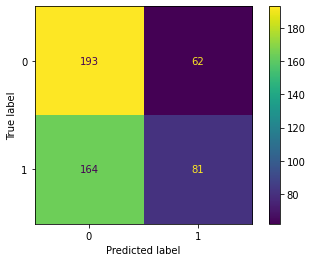

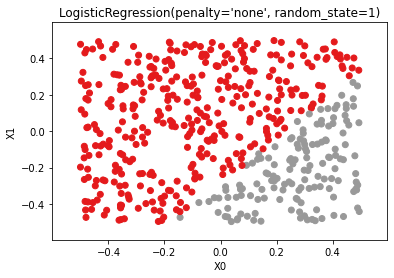

In [12]:
model = LogisticRegression(penalty='none', random_state=seed)
model.fit(X, y)

metrics.plot_confusion_matrix(model, X, y)
plt.figure()
plot_results(model, X, y, pad=.1)
print(f'Test accuracy: {metrics.accuracy_score(y, model.predict(X))}')

In [13]:
aug_X = np.hstack([X, X ** 2])

Test accuracy: 1.0


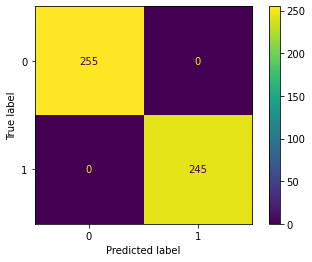

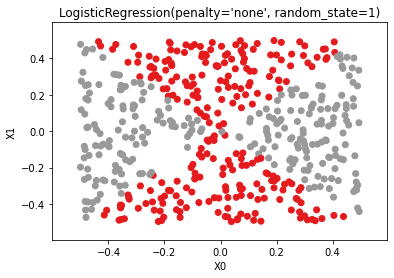

In [14]:
model = LogisticRegression(penalty='none', random_state=seed)
model.fit(aug_X, y)

metrics.plot_confusion_matrix(model, aug_X, y)
plt.figure()
plot_results(model, aug_X, y, pad=.1)
print(f'Test accuracy: {metrics.accuracy_score(y, model.predict(aug_X))}')

Test accuracy: 0.51


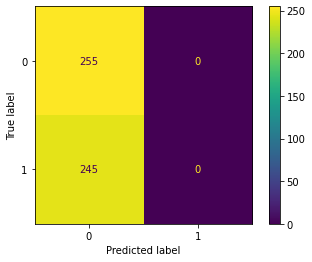

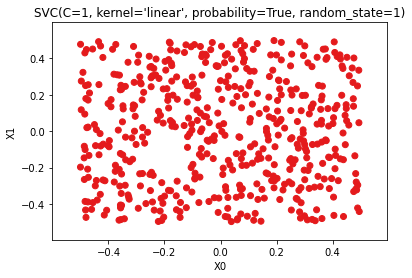

In [15]:
model = svm.SVC(kernel='linear', C=1, probability=True, random_state=seed)
model.fit(X, y)

metrics.plot_confusion_matrix(model, X, y)
plt.figure()
plot_results(model, X, y, pad=.1)
print(f'Test accuracy: {metrics.accuracy_score(y, model.predict(X))}')

Test accuracy: 0.98


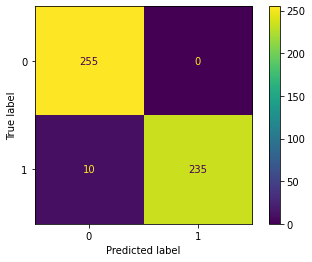

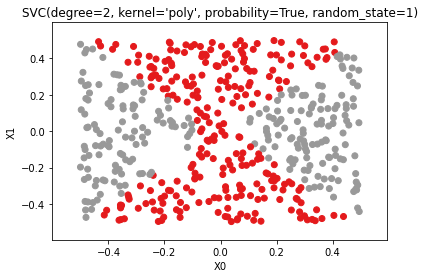

In [16]:
model = svm.SVC(kernel='poly', degree=2, probability=True, random_state=seed)
model.fit(X, y)

metrics.plot_confusion_matrix(model, X, y)
plt.figure()
plot_results(model, X, y, pad=.1)
print(f'Test accuracy: {metrics.accuracy_score(y, model.predict(X))}')

It's clearly seen that logistic regregression with linear features cannot figure out the relationship, however it performs better then SVM with linear kernel. Logistic regression with squared features perfectly fits train data, SVM with poly kernel with 2 degrees performs almost perfect.

# Ex. 6

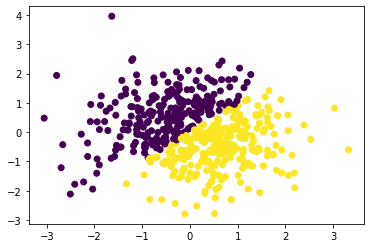

In [17]:
seed = 1
np.random.seed(seed)
X = np.random.normal(size=1000).reshape(500, 2)
y = (X[:, 0] - X[:, 1] > 0).astype(int)
plt.scatter(X[:, 0], X[:, 1], c=y)

In [18]:
grid = {
    'C': [0.01, 0.1, 1., 10., 100., 1000., 10000.]
}
cv = ms.KFold(n_splits=10, shuffle=True, random_state=seed)
gs = ms.GridSearchCV(svm.SVC(kernel='linear', random_state=seed), grid, cv=cv)
gs.fit(X, y)

pd.DataFrame(gs.cv_results_)[['param_C', 'mean_test_score', 'std_test_score']]

,param_C,mean_test_score,std_test_score
0,0.01,0.986,0.020100
1,0.1,0.996,0.012000
2,1,0.994,0.012806
3,10,0.990,0.016125
4,100,0.992,0.013266
5,1000,0.994,0.009165
6,10000,0.998,0.006000


Model with highest cost fits train data perfectly.

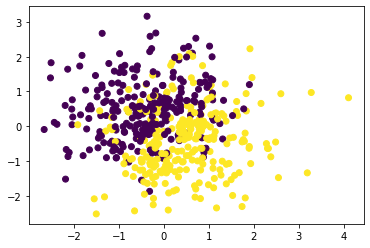

In [19]:
seed = 2
np.random.seed(seed)
X_test = np.random.normal(size=1000).reshape(500, 2)
y_test = (X_test[:, 0] - X_test[:, 1] > 0).astype(int)
for i in range(200, 300):
    X_test[i] = -X_test[i] if abs(X_test[i][0] - X_test[i][1]) < 2 else X_test[i]

plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test)

In [20]:
for c in grid['C']:
    model = svm.SVC(kernel='linear', C=c, random_state=seed)
    model.fit(X, y)
    print(f'{c}: {model.score(X_test, y_test)}')

0.01: 0.834
0.1: 0.834
1.0: 0.84
10.0: 0.836
100.0: 0.836
1000.0: 0.834
10000.0: 0.836


Several models except one with lowest cost showed good results. Model with cost of 1 is the best.

# Ex. 7

In [21]:
dataset_file = '../datasets/Auto.csv'
data = pd.read_csv(dataset_file)
data.drop(['name'], axis=1, inplace=True)
data = data.loc[data.horsepower != '?']
data.horsepower = data.horsepower.apply(int)
cyl_dummies = pd.get_dummies(data.cylinders, prefix='cylinders', prefix_sep='').drop(['cylinders8'], axis=1)
origin_dummies = pd.get_dummies(data.origin, prefix='origin', prefix_sep='').drop(['origin3'], axis=1)
data['above'] = (data.mpg > data.mpg.median()).astype(int)
data = pd.concat([data.drop(['mpg', 'cylinders', 'origin'], axis=1), cyl_dummies, origin_dummies], axis=1)
data.head()

/home/ivan2/projects/ISLR/venv/lib/python3.8/site-packages/pandas/core/computation/expressions.py:68: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return op(a, b)


,displacement,horsepower,weight,acceleration,year,above,cylinders3,cylinders4,cylinders5,cylinders6,origin1,origin2
0,307.0,130,3504,12.0,70,0,0,0,0,0,1,0
1,350.0,165,3693,11.5,70,0,0,0,0,0,1,0
2,318.0,150,3436,11.0,70,0,0,0,0,0,1,0
3,304.0,150,3433,12.0,70,0,0,0,0,0,1,0
4,302.0,140,3449,10.5,70,0,0,0,0,0,1,0


In [22]:
X = data.drop(['above'], axis=1)
y = data.above

In [23]:
grid = {
    'C': [0.01, 0.1, 1., 10., 100., 1000., 10000.]
}
cv = ms.KFold(n_splits=10, shuffle=True, random_state=seed)
gs1 = ms.GridSearchCV(svm.SVC(kernel='linear', random_state=seed), grid, cv=cv, n_jobs=-1, verbose=1)
gs1.fit(X, y)

pd.DataFrame(gs1.cv_results_)[['param_C', 'mean_test_score', 'std_test_score']]

Fitting 10 folds for each of 7 candidates, totalling 70 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   34.3s
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:  2.3min finished


,param_C,mean_test_score,std_test_score
0,0.01,0.913333,0.025866
1,0.1,0.918462,0.027252
2,1,0.908141,0.030793
3,10,0.908141,0.032859
4,100,0.908141,0.032859
5,1000,0.905577,0.032593
6,10000,0.905577,0.032593


In [57]:
grid = {
    'C': [0.01, 0.1, 1., 10., 100., 1000., 10000.],
    'gamma': [0.01, 0.1, 1, 10, 100]
}
cv = ms.KFold(n_splits=10, shuffle=True, random_state=seed)
gs2 = ms.GridSearchCV(svm.SVC(kernel='rbf', random_state=seed), grid, cv=cv, n_jobs=-1, verbose=1)
gs2.fit(X, y)

results = pd.DataFrame(gs2.cv_results_)
results[['param_C', 'param_gamma', 'mean_test_score', 'std_test_score']].sort_values(by='mean_test_score', ascending=False).iloc[:10]

Fitting 10 folds for each of 35 candidates, totalling 350 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    2.8s


KeyboardInterrupt: 

In [ ]:
grid = {
    'C': [0.01, 0.1, 1., 10., 100., 1000., 10000.],
    'degree': [2, 3, 4]
}
cv = ms.KFold(n_splits=10, shuffle=True, random_state=seed)
gs3 = ms.GridSearchCV(svm.SVC(kernel='poly', random_state=seed), grid, cv=cv, n_jobs=-1, verbose=1)
gs3.fit(X, y)

results = pd.DataFrame(gs3.cv_results_)
results[['param_C', 'param_degree', 'mean_test_score', 'std_test_score']].sort_values(by='mean_test_score', ascending=False).iloc[:10]

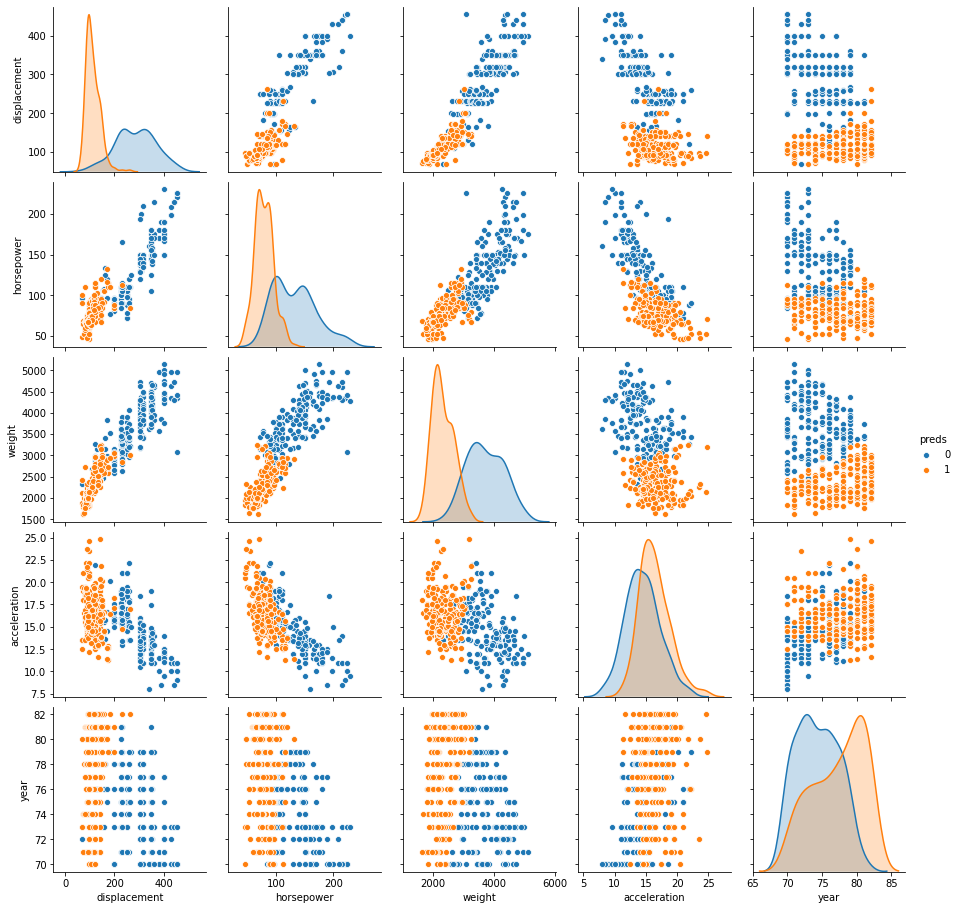

In [26]:
preds = gs1.best_estimator_.predict(X)
data_with_preds = X.drop(['origin1', 'origin2', 'cylinders3', 'cylinders4', 'cylinders5', 'cylinders6'], axis=1)
data_with_preds['preds'] = preds

sns.pairplot(
    data=data_with_preds,
    hue='preds'
)

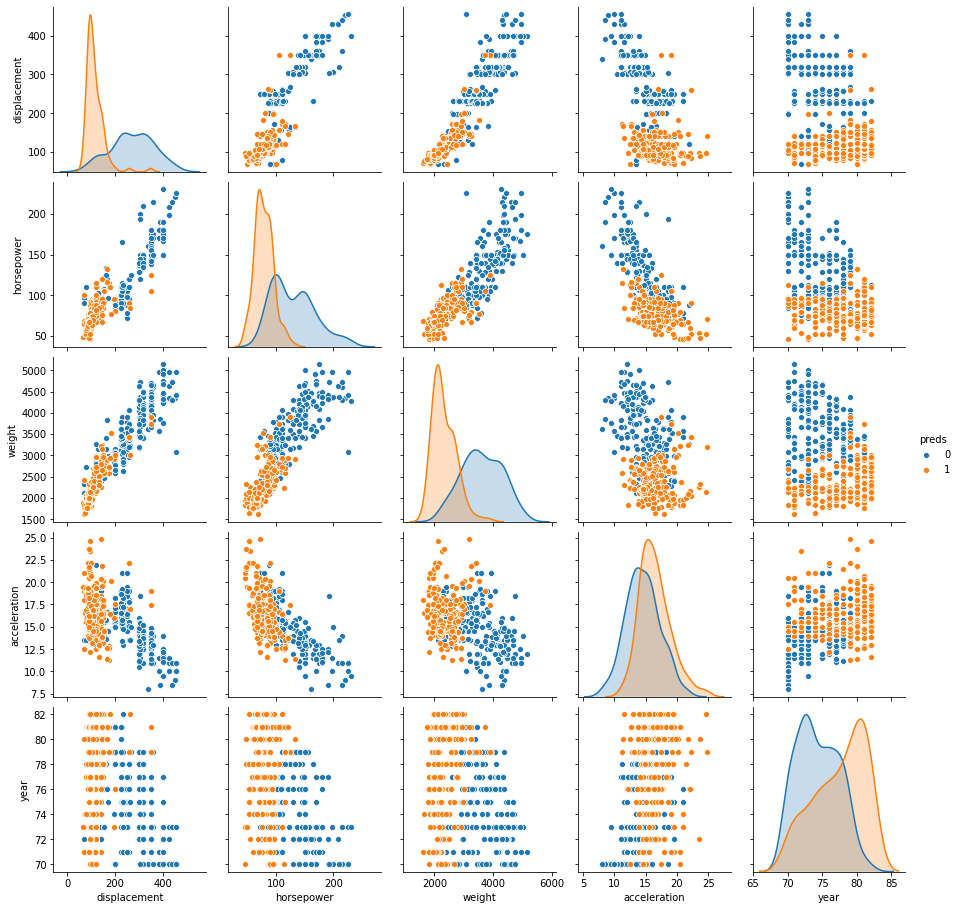

In [27]:
preds = gs2.best_estimator_.predict(X)
data_with_preds = X.drop(['origin1', 'origin2', 'cylinders3', 'cylinders4', 'cylinders5', 'cylinders6'], axis=1)
data_with_preds['preds'] = preds

sns.pairplot(
    data=data_with_preds,
    hue='preds'
)

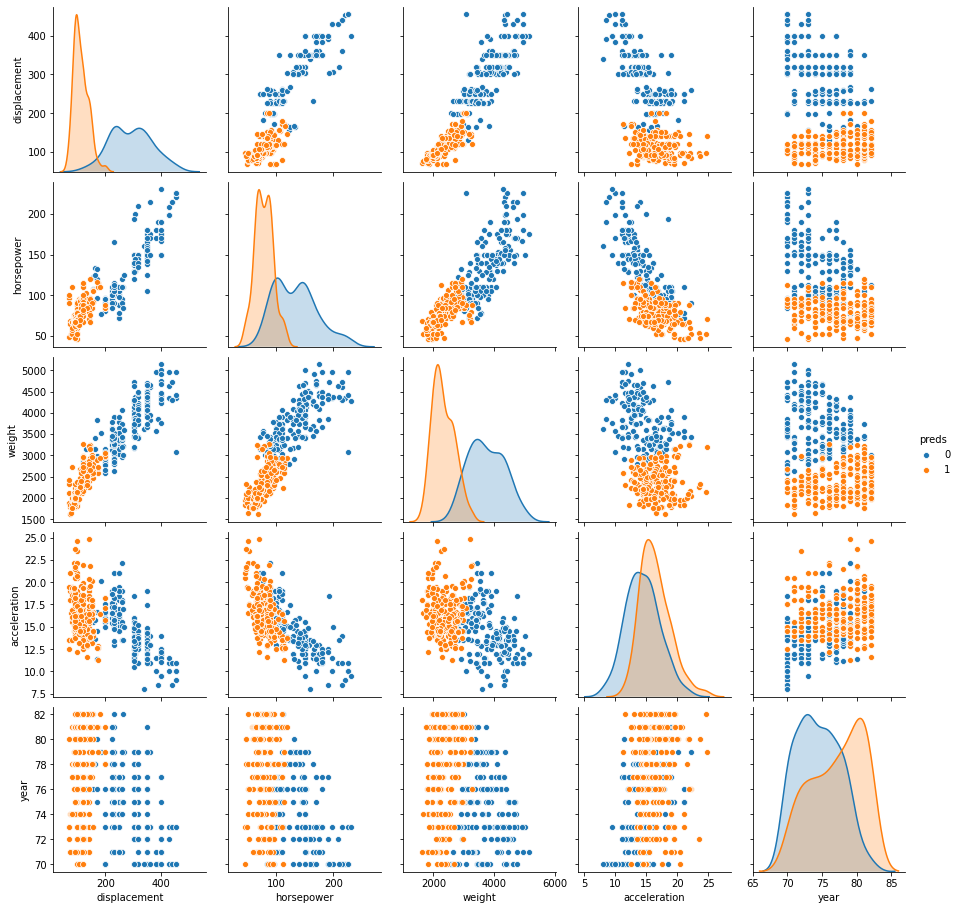

In [28]:
preds = gs3.best_estimator_.predict(X)
data_with_preds = X.drop(['origin1', 'origin2', 'cylinders3', 'cylinders4', 'cylinders5', 'cylinders6'], axis=1)
data_with_preds['preds'] = preds

sns.pairplot(
    data=data_with_preds,
    hue='preds'
)

SVM with linear kernel fits train data best. Among models with polynomial kernel the one with 3 degrees is the best. Models with radial kernel perform much worse.

# Ex. 8

In [52]:
dataset_file = '../datasets/OJ.csv'
seed = 1

data = pd.read_csv(dataset_file)

In [60]:
X = data.drop(['Purchase'], axis=1)
y = data['Purchase']
X = pd.get_dummies(X)
X = (X - X.mean()) / (X.max() - X.min())

X_train, X_test, y_train, y_test = ms.train_test_split(X, y, train_size=800, random_state=1)

Train error: 0.3325
Test error: 0.3593


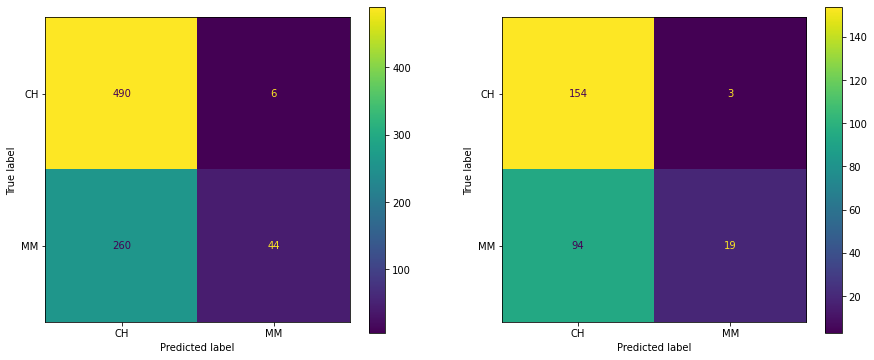

In [73]:
model = svm.SVC(kernel='linear', C=0.01, random_state=seed)
model.fit(X_train, y_train)

figs, axes = plt.subplots(ncols=2, figsize=[15,6])
metrics.plot_confusion_matrix(model, X_train, y_train, ax=axes[0])
metrics.plot_confusion_matrix(model, X_test, y_test, ax=axes[1])

print(f'Train error: {1 - metrics.accuracy_score(y_train, model.predict(X_train)):.4f}')
print(f'Test error: {1 - metrics.accuracy_score(y_test, model.predict(X_test)):.4f}')

In [74]:
grid = {
    'C': [0.01, 0.1, 1., 5., 10.]
}
cv = ms.KFold(n_splits=10, shuffle=True, random_state=seed)
gs1 = ms.GridSearchCV(svm.SVC(kernel='linear', random_state=seed), grid, cv=cv, n_jobs=-1, verbose=10)
gs1.fit(X, y)

pd.DataFrame(gs1.cv_results_)[['param_C', 'mean_test_score', 'std_test_score']]

Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0565s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    1.0s finished


,param_C,mean_test_score,std_test_score
0,0.01,0.754206,0.039441
1,0.1,0.823364,0.027231
2,1,0.829907,0.032590
3,5,0.827103,0.030212
4,10,0.828037,0.030485


Train error: 0.1562
Test error: 0.1630


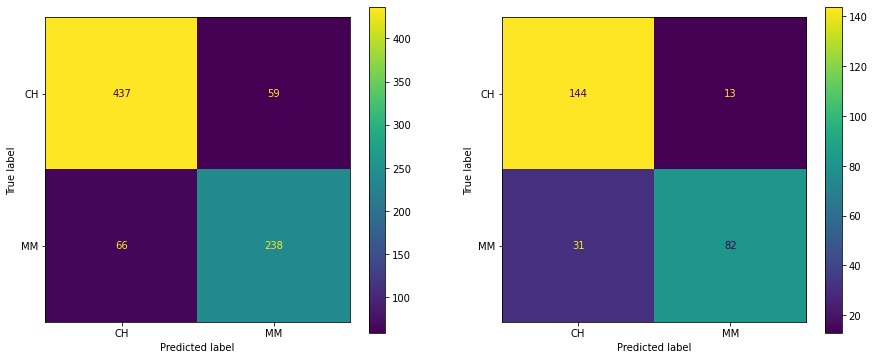

In [75]:
model = gs1.best_estimator_

figs, axes = plt.subplots(ncols=2, figsize=[15,6])
metrics.plot_confusion_matrix(model, X_train, y_train, ax=axes[0])
metrics.plot_confusion_matrix(model, X_test, y_test, ax=axes[1])

print(f'Train error: {1 - metrics.accuracy_score(y_train, model.predict(X_train)):.4f}')
print(f'Test error: {1 - metrics.accuracy_score(y_test, model.predict(X_test)):.4f}')

Train error: 0.3800
Test error: 0.4185


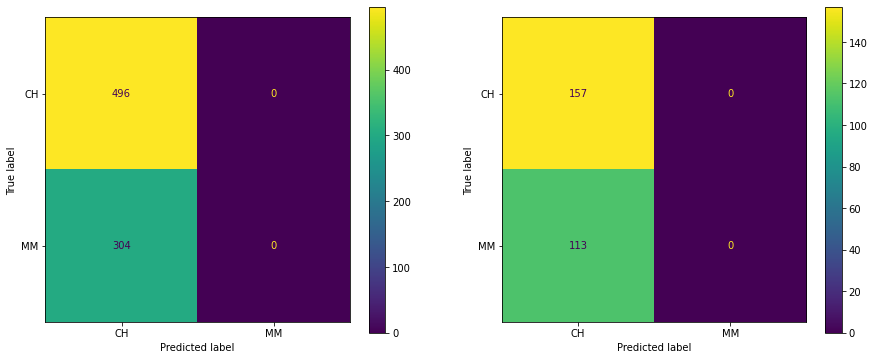

In [76]:
model = svm.SVC(kernel='rbf', C=0.01, random_state=seed)
model.fit(X_train, y_train)

figs, axes = plt.subplots(ncols=2, figsize=[15,6])
metrics.plot_confusion_matrix(model, X_train, y_train, ax=axes[0])
metrics.plot_confusion_matrix(model, X_test, y_test, ax=axes[1])

print(f'Train error: {1 - metrics.accuracy_score(y_train, model.predict(X_train)):.4f}')
print(f'Test error: {1 - metrics.accuracy_score(y_test, model.predict(X_test)):.4f}')

In [77]:
grid = {
    'C': [0.01, 0.1, 1., 5., 10.]
}
cv = ms.KFold(n_splits=10, shuffle=True, random_state=seed)
gs2 = ms.GridSearchCV(svm.SVC(kernel='rbf', random_state=seed), grid, cv=cv, n_jobs=-1, verbose=10)
gs2.fit(X, y)

pd.DataFrame(gs2.cv_results_)[['param_C', 'mean_test_score', 'std_test_score']]

Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0761s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    1.0s finished


,param_C,mean_test_score,std_test_score
0,0.01,0.610280,0.041806
1,0.1,0.800935,0.037395
2,1,0.826168,0.021394
3,5,0.828972,0.020919
4,10,0.827103,0.020582


Train error: 0.1500
Test error: 0.1481


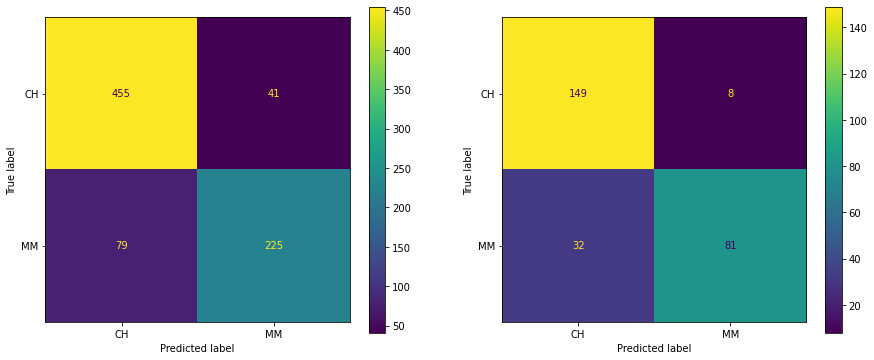

In [78]:
model = gs2.best_estimator_

figs, axes = plt.subplots(ncols=2, figsize=[15,6])
metrics.plot_confusion_matrix(model, X_train, y_train, ax=axes[0])
metrics.plot_confusion_matrix(model, X_test, y_test, ax=axes[1])

print(f'Train error: {1 - metrics.accuracy_score(y_train, model.predict(X_train)):.4f}')
print(f'Test error: {1 - metrics.accuracy_score(y_test, model.predict(X_test)):.4f}')

Train error: 0.3800
Test error: 0.4185


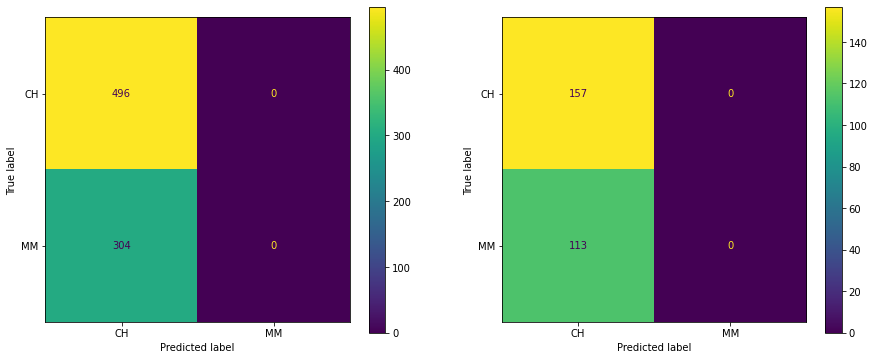

In [79]:
model = svm.SVC(kernel='poly', degree=2, C=0.01, random_state=seed)
model.fit(X_train, y_train)

figs, axes = plt.subplots(ncols=2, figsize=[15,6])
metrics.plot_confusion_matrix(model, X_train, y_train, ax=axes[0])
metrics.plot_confusion_matrix(model, X_test, y_test, ax=axes[1])

print(f'Train error: {1 - metrics.accuracy_score(y_train, model.predict(X_train)):.4f}')
print(f'Test error: {1 - metrics.accuracy_score(y_test, model.predict(X_test)):.4f}')

In [80]:
grid = {
    'C': [0.01, 0.1, 1., 5., 10.]
}
cv = ms.KFold(n_splits=10, shuffle=True, random_state=seed)
gs3 = ms.GridSearchCV(svm.SVC(kernel='poly', degree=2, random_state=seed), grid, cv=cv, n_jobs=-1, verbose=10)
gs3.fit(X, y)

pd.DataFrame(gs3.cv_results_)[['param_C', 'mean_test_score', 'std_test_score']]

Fitting 10 folds for each of 5 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0676s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  43 out of  50 | elapsed:    1.1s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    1.2s finished


,param_C,mean_test_score,std_test_score
0,0.01,0.610280,0.041806
1,0.1,0.689720,0.035168
2,1,0.765421,0.054886
3,5,0.767290,0.041047
4,10,0.778505,0.039662


Train error: 0.1937
Test error: 0.2259


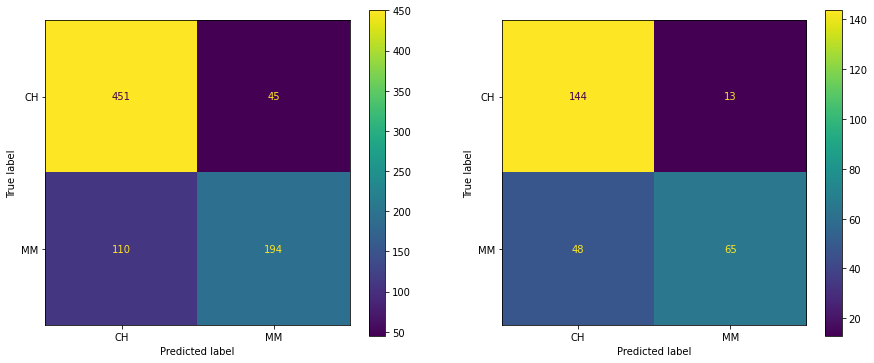

In [81]:
model = gs3.best_estimator_

figs, axes = plt.subplots(ncols=2, figsize=[15,6])
metrics.plot_confusion_matrix(model, X_train, y_train, ax=axes[0])
metrics.plot_confusion_matrix(model, X_test, y_test, ax=axes[1])

print(f'Train error: {1 - metrics.accuracy_score(y_train, model.predict(X_train)):.4f}')
print(f'Test error: {1 - metrics.accuracy_score(y_test, model.predict(X_test)):.4f}')

Radial kernel has the lowest test error rate.